In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
# Cargamos el dataset del Titanic
path_archivo = 'titanic.csv'
titanic_df = pd.read_csv(path_archivo)

In [4]:
# Limpieza de valores nulos
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

C:\Users\HARO\AppData\Local\Temp\ipykernel_9300\1934205000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\HARO\AppData\Local\Temp\ipykernel_9300\1934205000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [5]:
# Se realiza la converson de variables categóricas
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [6]:
# Aqui, se separan las características y variables objetivo
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [7]:
# Posteriormente,se procede a dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística

In [8]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Modelo de Árbol de Decisión

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [10]:
# Finalmente, evaluamos las métricas de clasificación para ambos modelos
log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_clf_report = classification_report(y_test, y_pred_tree)

print("Regresión Logística Reporte:")
print(log_reg_report)

print("Árbol de Decisión Reporte:")
print(tree_clf_report)

Regresión Logística Reporte:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Árbol de Decisión Reporte:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# Representacion Gràfica de las mètricas de clasificacion

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# importaos librerias adicionales
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

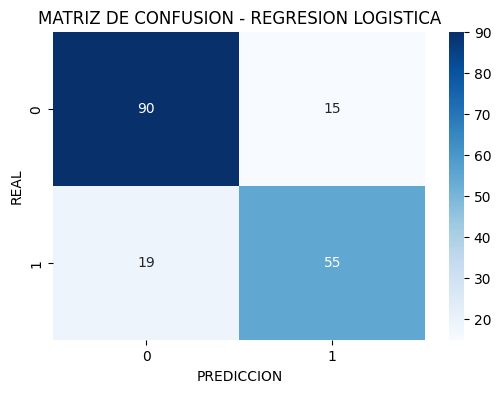

In [13]:
# a. Primero, creamos la matriz de confusión para Regresión Logistica
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('MATRIZ DE CONFUSION - REGRESION LOGISTICA')
plt.xlabel('PREDICCION')
plt.ylabel('REAL')
plt.show()

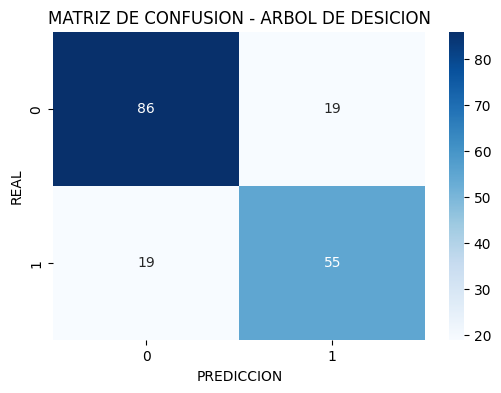

In [14]:
# b. Luego, creamos la matriz de confusión para Arbol de Decision
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('MATRIZ DE CONFUSION - ARBOL DE DESICION')
plt.xlabel('PREDICCION')
plt.ylabel('REAL')
plt.show()


In [20]:
# Extraer los valores del reporte de clasificación para cada modelo
from sklearn.metrics import precision_score, recall_score, f1_score

# Definición de mètricas

In [21]:
# Para Regresión Logística
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

In [22]:
# Para Árbol de Decisión
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

In [24]:
# Creamos un df para las métricas
metrics_df = pd.DataFrame({
    'Modelo': ['REGRESION LOGISTICA', 'ARBOL DE DESICION'],
    'Precisión': [precision_log_reg, precision_tree],
    'Recall': [recall_log_reg, recall_tree],
    'F1-Score': [f1_log_reg, f1_tree]
})

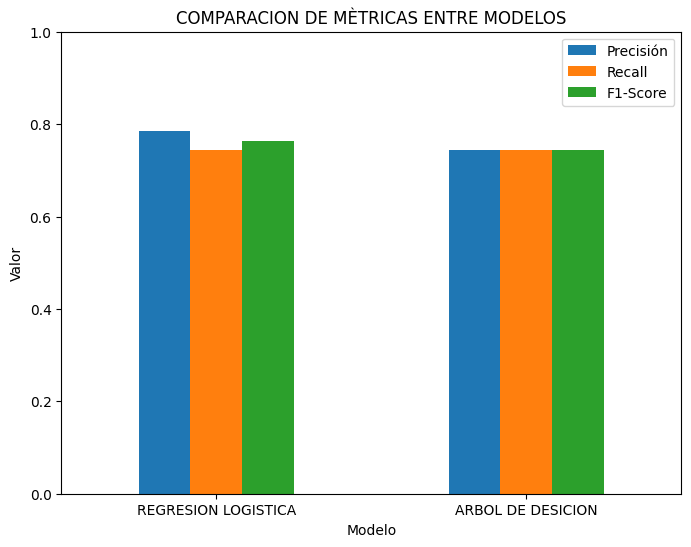

In [25]:
# Finalente representaos los resultados en un gráfico de barras para comparar las métricas
metrics_df.set_index('Modelo').plot(kind='bar', figsize=(8, 6))
plt.title('COMPARACION DE MÈTRICAS ENTRE MODELOS')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# Interpretaciòn de los resultados

En resumen se puede decir que el modelo de Árbol de Decisión tiende a sobreajustarse y puede ser menos generalizable, mientras que la Regresión Logística ofrece un mejor equilibrio en cuanto a precisión y sensibilidad (recall), siendo más robusta en predicciones generales.